In [17]:
import os
import pathlib
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.cluster import MiniBatchKMeans
import warnings  

warnings.simplefilter('ignore')  # Fix NumPy issues.

%matplotlib inline
%run my_functions.ipynb

In [3]:
data_path = '../data/Faces/'
labels_path = '../data/labels.csv'
result_path = '../results'
names_path = "../data/filenames.txt"
file_data_path = "../files"
data_set_gray_npy = os.path.join(file_data_path, 'data_gray.npy')
data_set_rgb_npy = os.path.join(file_data_path, 'data_rgb.npy')
labels_csv_path = os.path.join(file_data_path, 'data_rgb.npy')

In [4]:
# Open a random image to get dimensions
h, w = get_dimensions_from_an_image(data_path, 0, as_gray=True)

In [5]:
# Get labels as pandas object from labels.csv
labels = get_labels_df(
    labels_path=labels_path, names_path=names_path)
labels

,actual_filename,image_no,age,gender,race
0,100_0_0_20170112213500903.jpg.chip.jpg,0,100,0,0
1,100_0_0_20170112215240346.jpg.chip.jpg,1,100,0,0
2,100_1_0_20170110183726390.jpg.chip.jpg,2,100,1,0
3,100_1_0_20170112213001988.jpg.chip.jpg,3,100,1,0
4,100_1_0_20170112213303693.jpg.chip.jpg,4,100,1,0
...,...,...,...,...,...
23700,9_1_3_20161220222856346.jpg.chip.jpg,23700,9,1,3
23701,9_1_3_20170104222949455.jpg.chip.jpg,23701,9,1,3
23702,9_1_4_20170103200637399.jpg.chip.jpg,23702,9,1,4
23703,9_1_4_20170103200814791.jpg.chip.jpg,23703,9,1,4


In [6]:
X = np.load(data_set_rgb_npy)
dirs = os.listdir(data_path)

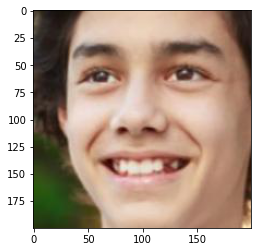

In [9]:
# Show an image for verification
plt.imshow(X[100].reshape(200,200,3), cmap=plt.cm.gray)

In [10]:
start_age = 20
end_age = 30
cut_index = labels.query('age >= @start_age and age <= @end_age')

In [11]:
cut_index.shape

(8068, 5)

In [20]:
X = X[cut_index.index]

IndexError: index 8068 is out of bounds for axis 0 with size 8068

In [21]:
print(f'Size as int: {convert_size(X.nbytes)}')

Size as int: 923.31 MB


  0%|                                                   | 1/8068 [00:00<50:02,  2.69it/s]


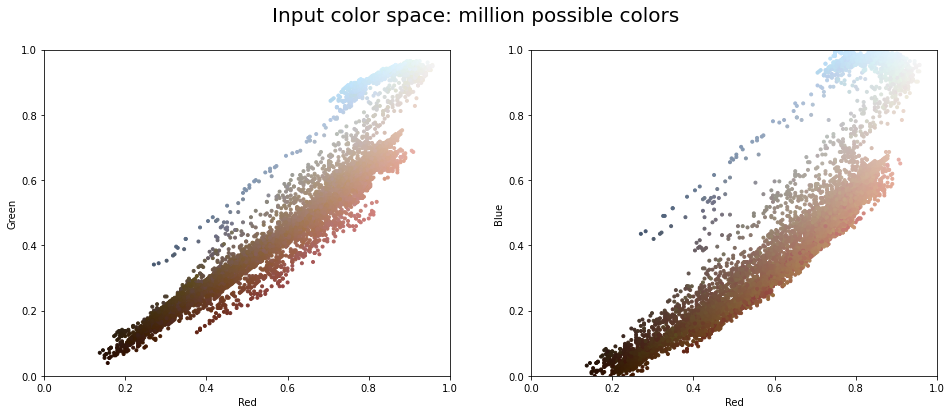

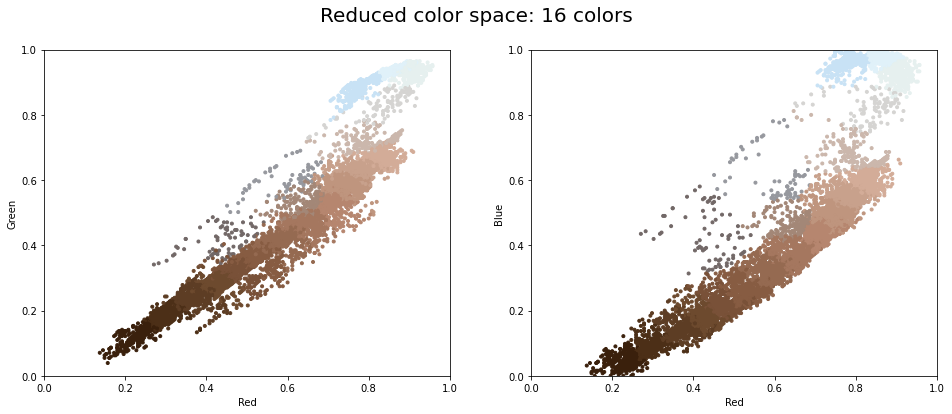

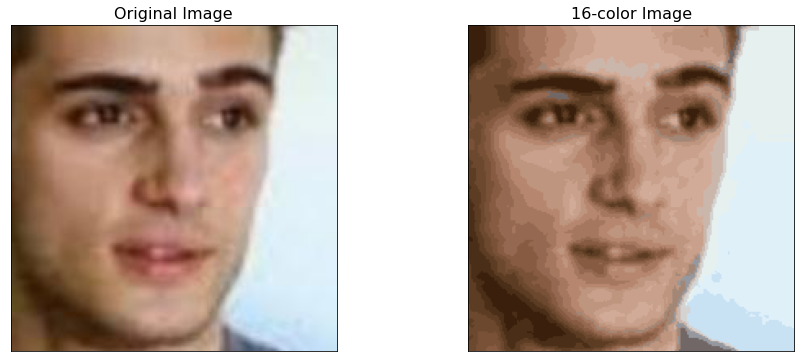

In [33]:
X_new = np.empty((cut_index.shape[0], h*w, 3))

for i in tqdm(range(X.shape[0])):
    img = X[i].reshape(h, w , 3) / 255
    img = img.reshape(h*w, 3)
    
    clusters = 16
    kmeans = MiniBatchKMeans(20)
    kmeans.fit(img)
    new_colors = kmeans.cluster_centers_[kmeans.predict(img)]
    
    new_img = new_colors.reshape(h, w, 3)
    X_new[i] = new_img.reshape(1, -1, 3)
    
    if i == 1:
        # plot for the first picture
        plot_pixels(img, title='Input color space: million possible colors')
        plot_pixels(img, colors=new_colors,
        title="Reduced color space: 16 colors")
        fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
        fig.subplots_adjust(wspace=0.05)
        ax[0].imshow(X[i].reshape(h, w , 3))
        ax[0].set_title('Original Image', size=16)
        ax[1].imshow(new_img)
        ax[1].set_title('16-color Image', size=16)
        break
    

In [26]:
print(f'Size as int: {convert_size(X_new.nbytes)}')

Size as int: 7.21 GB


In [30]:
new_colors.reshape(h, w, 3).shape

(200, 200, 3)

In [31]:
X_new[0]

array([[0.27645983, 0.21993763, 0.14836004],
       [0.27645983, 0.21993763, 0.14836004],
       [0.27645983, 0.21993763, 0.14836004],
       ...,
       [0.17582664, 0.13705231, 0.09130309],
       [0.17582664, 0.13705231, 0.09130309],
       [0.17582664, 0.13705231, 0.09130309]])

In [35]:
new_colors.shape

(40000, 3)